In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak
import numpy as np
import uproot
import hist
from functions import *
NanoAODSchema.warn_missing_crossrefs = False
hep.style.use('CMS')

In [2]:
fname = 'root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/ForHiggsTo4Leptons/Run2012B_DoubleElectron.root'

In [3]:
# Setting entry_stop=50000 will use the first 50000 events, this will make it run faster when trobuleshooting.
allEvents = 1
if allEvents == 1: numEvents = None
else: numEvents = 5000
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema.v6, entry_stop=numEvents).events()

In [4]:
selectedLeptonsminus = LeptonSelectionForWBoson(events, 25, 2.4 , 'Electron', -1)
selectedLeptonsplus  = LeptonSelectionForWBoson(events, 25, 2.4 , 'Electron',  1)
h1 = WInvariantMassHist(selectedLeptonsminus,1000)
h2 = WInvariantMassHist(selectedLeptonsplus,1000)

In [5]:
# cmsWPlot(h1,'wminus_pT_miss.jpg','$p_T^{miss}$')
# cmsWPlot(h2,'wplus_pT_miss.jpg','$p_T^{miss}$')

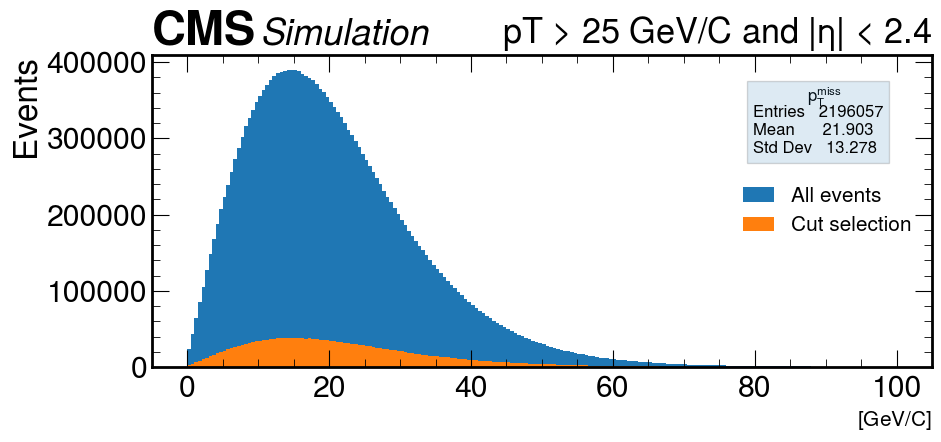

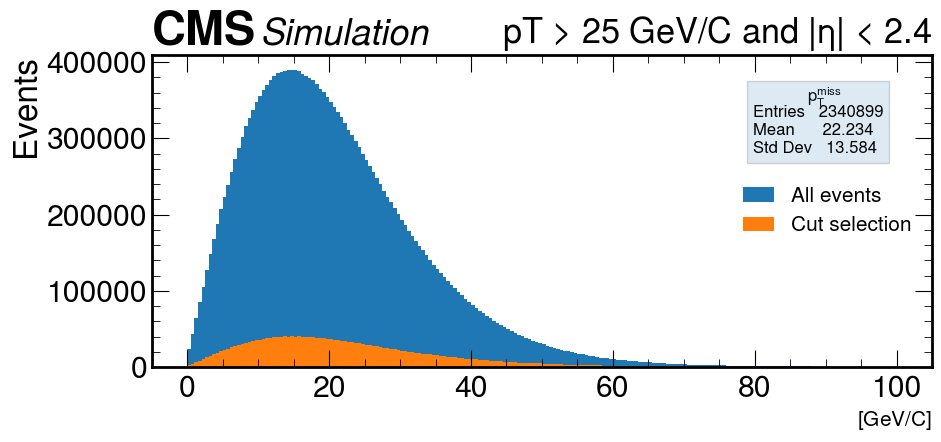

In [8]:
h3 = hist.Hist(hist.axis.Regular(200, 0, 100, name='Invariant Mass[GeV/C^2]'))
h3.fill(selectedLeptonsminus.MET.pt)
h4 = hist.Hist(hist.axis.Regular(200, 0, 100, name='Invariant Mass[GeV/C^2]'))
h4.fill(events.MET.pt)
WpTMissingHist(h4,h3, 'wminus_pT_miss.jpg')
h5 = hist.Hist(hist.axis.Regular(200, 0, 100, name='Invariant Mass[GeV/C^2]'))
h5.fill(selectedLeptonsplus.MET.pt)
h6 = hist.Hist(hist.axis.Regular(200, 0, 100, name='Invariant Mass[GeV/C^2]'))
h6.fill(events.MET.pt)
WpTMissingHist(h6, h5,  'wplus_pT_miss.jpg')